In [1]:
#Programa inteligente que aprende a jugar "Yan ken po" con keras
options = ["piedra", "tijeras", "papel"]
def search_winner(p1, p2):
    if p1 == p2:
        result = 0
    elif p1 == "piedra" and p2 == "tijeras":
        result = 1
    elif p1 == "piedra" and p2 == "papel":
        result = 2
    elif p1 == "tijeras" and p2 == "piedra":
        result = 2
    elif p1 == "tijeras" and p2 == "papel":
        result = 1
    elif p1 == "papel" and p2 == "piedra":
        result = 1
    elif p1 == "papel" and p2 == "tijeras":
        result = 2
    return result

search_winner("papel", "tijeras")

2

In [2]:
from random import choice
def get_choice():
    return choice(options)

for i in range(10):
    player1 = get_choice()
    player2 = get_choice()
    print("player1: %s player2: %s Winner: %s " % (
        player1, player2, search_winner(player1, player2)
    ))

player1: piedra player2: tijeras Winner: 1 
player1: tijeras player2: papel Winner: 1 
player1: papel player2: papel Winner: 0 
player1: papel player2: papel Winner: 0 
player1: tijeras player2: piedra Winner: 2 
player1: piedra player2: piedra Winner: 0 
player1: papel player2: papel Winner: 0 
player1: papel player2: papel Winner: 0 
player1: papel player2: papel Winner: 0 
player1: piedra player2: piedra Winner: 0 


In [3]:
#vectorizar y crear el dataser con sus clases segun el experto
def str_to_list(option):
    if option=="piedra":
        res = [1,0,0]
    elif option=="tijeras":
        res = [0,1,0]
    else:
        res = [0,0,1]
    return res

data_X = list(map(str_to_list, ["piedra", "tijeras", "papel", "papel"]))
data_y = list(map(str_to_list, ["papel", "piedra", "tijeras", "tijeras"]))
print(data_X)
print(data_y)

[[1, 0, 0], [0, 1, 0], [0, 0, 1], [0, 0, 1]]
[[0, 0, 1], [1, 0, 0], [0, 1, 0], [0, 1, 0]]


In [4]:
# cargamos las 4 combinaciones de las compuertas XOR
#training_data = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")

# y estos son los resultados que se obtienen, en el mismo orden
#target_data = np.array([[0],[1],[1],[0]], "float32")

In [5]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(3,)))
#model.add(Dense(3, activation='softmax'))

#model.add(Dense(16, input_dim=3, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.summary()

Using TensorFlow backend.
C:\python\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\python\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\python\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\python\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning:

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 808       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 27        
Total params: 1,235
Trainable params: 1,235
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
#model.fit([data_X], [data_y], batch_size=1, epochs=55)
model.fit([data_X], [data_y], validation_split=0.0001,  
          epochs=1000, batch_size=10, verbose=1)



Train on 3 samples, validate on 1 samples
Epoch 1/1000
3/3 [==============================] - 0s 126ms/step - loss: 0.7025 - accuracy: 0.3333 - val_loss: 0.6520 - val_accuracy: 0.6667
Epoch 2/1000
3/3 [==============================] - 0s 666us/step - loss: 0.6994 - accuracy: 0.4444 - val_loss: 0.6503 - val_accuracy: 1.0000
Epoch 3/1000
3/3 [==============================] - 0s 999us/step - loss: 0.6962 - accuracy: 0.5556 - val_loss: 0.6486 - val_accuracy: 1.0000
Epoch 4/1000
3/3 [==============================] - 0s 999us/step - loss: 0.6932 - accuracy: 0.5556 - val_loss: 0.6469 - val_accuracy: 1.0000
Epoch 5/1000
3/3 [==============================] - 0s 666us/step - loss: 0.6901 - accuracy: 0.4444 - val_loss: 0.6451 - val_accuracy: 1.0000
Epoch 6/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.6872 - accuracy: 0.4444 - val_loss: 0.6434 - val_accuracy: 1.0000
Epoch 7/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.6847 - accuracy: 0.5556 - val_

Epoch 58/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.5616 - accuracy: 0.7778 - val_loss: 0.4141 - val_accuracy: 1.0000
Epoch 59/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.5591 - accuracy: 0.7778 - val_loss: 0.4088 - val_accuracy: 1.0000
Epoch 60/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.5565 - accuracy: 0.7778 - val_loss: 0.4034 - val_accuracy: 1.0000
Epoch 61/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.5538 - accuracy: 0.7778 - val_loss: 0.3980 - val_accuracy: 1.0000
Epoch 62/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.5513 - accuracy: 0.7778 - val_loss: 0.3926 - val_accuracy: 1.0000
Epoch 63/1000
3/3 [==============================] - 0s 999us/step - loss: 0.5488 - accuracy: 0.7778 - val_loss: 0.3874 - val_accuracy: 1.0000
Epoch 64/1000
3/3 [==============================] - 0s 666us/step - loss: 0.5461 - accuracy: 0.7778 - val_loss: 0.3823 - val_accuracy: 1.0000
Epoch 65/

Epoch 116/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4135 - accuracy: 0.6667 - val_loss: 0.1782 - val_accuracy: 1.0000
Epoch 117/1000
3/3 [==============================] - 0s 999us/step - loss: 0.4113 - accuracy: 0.6667 - val_loss: 0.1757 - val_accuracy: 1.0000
Epoch 118/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.4091 - accuracy: 0.6667 - val_loss: 0.1734 - val_accuracy: 1.0000
Epoch 119/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.4067 - accuracy: 0.6667 - val_loss: 0.1711 - val_accuracy: 1.0000
Epoch 120/1000
3/3 [==============================] - 0s 999us/step - loss: 0.4046 - accuracy: 0.6667 - val_loss: 0.1689 - val_accuracy: 1.0000
Epoch 121/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.4024 - accuracy: 0.6667 - val_loss: 0.1670 - val_accuracy: 1.0000
Epoch 122/1000
3/3 [==============================] - 0s 999us/step - loss: 0.4002 - accuracy: 0.6667 - val_loss: 0.1650 - val_accuracy: 1.00

Epoch 174/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.3006 - accuracy: 1.0000 - val_loss: 0.1059 - val_accuracy: 1.0000
Epoch 175/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.2989 - accuracy: 1.0000 - val_loss: 0.1052 - val_accuracy: 1.0000
Epoch 176/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.2972 - accuracy: 1.0000 - val_loss: 0.1047 - val_accuracy: 1.0000
Epoch 177/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.2954 - accuracy: 1.0000 - val_loss: 0.1043 - val_accuracy: 1.0000
Epoch 178/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.2937 - accuracy: 1.0000 - val_loss: 0.1039 - val_accuracy: 1.0000
Epoch 179/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2920 - accuracy: 1.0000 - val_loss: 0.1034 - val_accuracy: 1.0000
Epoch 180/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2903 - accuracy: 1.0000 - val_loss: 0.1029 - val_accuracy: 1.0000
Epoch 

Epoch 232/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.2012 - accuracy: 1.0000 - val_loss: 0.0830 - val_accuracy: 1.0000
Epoch 233/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.1995 - accuracy: 1.0000 - val_loss: 0.0826 - val_accuracy: 1.0000
Epoch 234/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1978 - accuracy: 1.0000 - val_loss: 0.0823 - val_accuracy: 1.0000
Epoch 235/1000
3/3 [==============================] - 0s 998us/step - loss: 0.1960 - accuracy: 1.0000 - val_loss: 0.0819 - val_accuracy: 1.0000
Epoch 236/1000
3/3 [==============================] - 0s 999us/step - loss: 0.1943 - accuracy: 1.0000 - val_loss: 0.0815 - val_accuracy: 1.0000
Epoch 237/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.1925 - accuracy: 1.0000 - val_loss: 0.0811 - val_accuracy: 1.0000
Epoch 238/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.1907 - accuracy: 1.0000 - val_loss: 0.0807 - val_accuracy: 1.0000
Ep

Epoch 290/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.1039 - accuracy: 1.0000 - val_loss: 0.0532 - val_accuracy: 1.0000
Epoch 291/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.1025 - accuracy: 1.0000 - val_loss: 0.0526 - val_accuracy: 1.0000
Epoch 292/1000
3/3 [==============================] - 0s 999us/step - loss: 0.1011 - accuracy: 1.0000 - val_loss: 0.0519 - val_accuracy: 1.0000
Epoch 293/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0997 - accuracy: 1.0000 - val_loss: 0.0512 - val_accuracy: 1.0000
Epoch 294/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0983 - accuracy: 1.0000 - val_loss: 0.0506 - val_accuracy: 1.0000
Epoch 295/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0969 - accuracy: 1.0000 - val_loss: 0.0499 - val_accuracy: 1.0000
Epoch 296/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0956 - accuracy: 1.0000 - val_loss: 0.0492 - val_accuracy: 1.0000


Epoch 348/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0453 - accuracy: 1.0000 - val_loss: 0.0259 - val_accuracy: 1.0000
Epoch 349/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0446 - accuracy: 1.0000 - val_loss: 0.0256 - val_accuracy: 1.0000
Epoch 350/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0440 - accuracy: 1.0000 - val_loss: 0.0253 - val_accuracy: 1.0000
Epoch 351/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0434 - accuracy: 1.0000 - val_loss: 0.0250 - val_accuracy: 1.0000
Epoch 352/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0428 - accuracy: 1.0000 - val_loss: 0.0247 - val_accuracy: 1.0000
Epoch 353/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0423 - accuracy: 1.0000 - val_loss: 0.0244 - val_accuracy: 1.0000
Epoch 354/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0417 - accuracy: 1.0000 - val_loss: 0.0241 - val_accuracy: 1.0000
Epoc

Epoch 406/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0219 - accuracy: 1.0000 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 407/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0217 - accuracy: 1.0000 - val_loss: 0.0136 - val_accuracy: 1.0000
Epoch 408/1000
3/3 [==============================] - 0s 667us/step - loss: 0.0214 - accuracy: 1.0000 - val_loss: 0.0135 - val_accuracy: 1.0000
Epoch 409/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0212 - accuracy: 1.0000 - val_loss: 0.0134 - val_accuracy: 1.0000
Epoch 410/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0210 - accuracy: 1.0000 - val_loss: 0.0133 - val_accuracy: 1.0000
Epoch 411/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0208 - accuracy: 1.0000 - val_loss: 0.0131 - val_accuracy: 1.0000
Epoch 412/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0205 - accuracy: 1.0000 - val_loss: 0.0130 - val_accuracy:

Epoch 464/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 465/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0124 - accuracy: 1.0000 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 466/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 467/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.0083 - val_accuracy: 1.0000
Epoch 468/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.0082 - val_accuracy: 1.0000
Epoch 469/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 0.0082 - val_accuracy: 1.0000
Epoch 470/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0119 - accuracy: 1.0000 - val_loss: 0.0081 - val_accuracy: 1.0000

Epoch 522/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 523/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 524/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 525/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 526/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 527/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 528/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 

Epoch 580/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 581/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 582/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 583/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 584/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 585/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 586/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Ep

Epoch 638/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 639/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 640/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 641/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 642/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 643/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 644/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000

Epoch 696/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 697/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 698/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 699/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 700/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 701/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 702/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Ep

Epoch 754/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 755/1000
3/3 [==============================] - 0s 998us/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 756/1000
3/3 [==============================] - 0s 998us/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 757/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 758/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 759/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 760/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.00

Epoch 812/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 813/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 814/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 815/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 816/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 817/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 818/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
E

Epoch 870/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 871/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 872/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 873/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 874/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 875/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 876/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1

Epoch 928/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 929/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 930/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 931/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 932/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 933/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 934/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.000

Epoch 986/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 987/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 988/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 989/1000
3/3 [==============================] - 0s 998us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 990/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 991/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 992/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1

In [8]:
model.history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

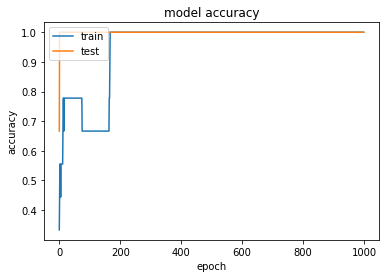

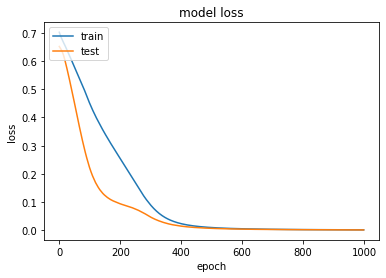

In [9]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
test_eval = model.evaluate([data_X], [data_y], verbose=1)

4/4 [==============================] - 0s 250us/step


In [11]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.0011667018989101052
Test accuracy: 1.0


In [12]:
print(model.predict([[str_to_list("piedra")]]) ) # [1, 0, 0]
print(model.predict([[str_to_list("tijeras")]])) # [0, 1, 0]
print(model.predict([[str_to_list("papel")]])  ) # [0, 0, 1]

[[1.3854617e-05 2.0362835e-03 9.9886703e-01]]
[[9.9660575e-01 1.1480259e-03 6.4730571e-05]]
[[7.0683553e-04 9.9832112e-01 7.1290543e-04]]
